In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader, Dataset, random_split
from torch.utils.data import random_split
import matplotlib.pyplot as plt
from torchinfo import summary

5


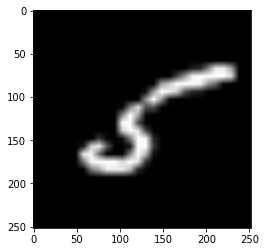

In [2]:
train_dataset = torchvision.datasets.MNIST(root="./", train=True, download=True)
image, label = train_dataset[11]
print(label)
plt.imshow(image, cmap="gray")
a = transforms.Resize(252)(image)
plt.imshow(a, cmap="gray")

# Training Vanilla CNN for MNIST Data

In [4]:
#Hyper Parameters
batch_size = 32
learning_rate = 0.001
epochs = 1
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=0.1307, std=0.3081)])
train_dataset = torchvision.datasets.MNIST(root="./", train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root="./", train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 12, kernel_size=1)
        self.conv2 = nn.Conv2d(12, 6, kernel_size=3)
        self.max_pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(1014, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128,10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.max_pool(x)
        x = x.view(-1, 1014)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
model = CNN().to(device=device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

n_total_steps = len(train_loader)
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f} ')

Epoch [1/1], Step [100/1875], Loss: 0.6733 
Epoch [1/1], Step [200/1875], Loss: 0.2787 
Epoch [1/1], Step [300/1875], Loss: 0.3791 
Epoch [1/1], Step [400/1875], Loss: 0.3074 
Epoch [1/1], Step [500/1875], Loss: 0.1071 
Epoch [1/1], Step [600/1875], Loss: 0.1207 
Epoch [1/1], Step [700/1875], Loss: 0.1889 
Epoch [1/1], Step [800/1875], Loss: 0.4430 
Epoch [1/1], Step [900/1875], Loss: 0.2902 
Epoch [1/1], Step [1000/1875], Loss: 0.1656 
Epoch [1/1], Step [1100/1875], Loss: 0.0938 
Epoch [1/1], Step [1200/1875], Loss: 0.2238 
Epoch [1/1], Step [1300/1875], Loss: 0.0591 
Epoch [1/1], Step [1400/1875], Loss: 0.0747 
Epoch [1/1], Step [1500/1875], Loss: 0.1415 
Epoch [1/1], Step [1600/1875], Loss: 0.0189 
Epoch [1/1], Step [1700/1875], Loss: 0.0102 
Epoch [1/1], Step [1800/1875], Loss: 0.0465 


In [8]:
def data_aug(img_tensor):
    aug = transforms.RandomResizedCrop(20, scale=(0.08,0.1))(img_tensor)
    aug = transforms.RandomHorizontalFlip(p=0.5)(aug)
    aug = transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.2, hue=0.1)(aug)
    #aug = transforms.RandomGrayscale(0.2)(aug)
    aug = transforms.GaussianBlur(kernel_size=23, sigma=0.5)(aug)
    aug = transforms.RandomSolarize(threshold=0.3,p=0.1)(aug)
    #aug = transforms.Normalize()(aug)
    return aug
    

N = 128
data = torch.rand(N,1,20,20)
data = data_aug(data)
print(data.shape)
max_pool = nn.MaxPool2d(2, 2)
conv1 = nn.Conv2d(1, 8, kernel_size=1)
conv2 = nn.Conv2d(8, 16, kernel_size=3)
conv3 = nn.Conv2d(16, 32, kernel_size=2)
x = conv1(data)
print(f"Tensor shape after first Conv Layer: {x.shape} ")
x = max_pool(x)
print(f"Tensor shape after first MaxPool Layer: {x.shape}")
x = conv2(x)
print(f"Tensor shape after second Conv Layer: {x.shape}")
x = max_pool(x)
print(f"Tensor shape after MaxPool Layer: {x.shape}")
x = conv3(x)
print(f"Tensor shape after third Conv Layer: {x.shape}")
x = max_pool(x)
print(f"Tensor shape after third maxpool layer: {x.shape}")
x = x.view(-1,32)
print(x.shape)
fc1 = nn.Linear(32, 64)
x = fc1(x)
print(f"Tensor shape after first FC Layer: {x.shape}")
fc2 = nn.Linear(64, 64)
x = fc2(x)
print(f"Tensor shape after second FC Layer: {x.shape}")
fc3 = nn.Linear(64,64)
x = fc3(x)
print(f"Tensor shape after third FC Layer: {x.shape}")

torch.Size([128, 1, 20, 20])
Tensor shape after first Conv Layer: torch.Size([128, 8, 20, 20]) 
Tensor shape after first MaxPool Layer: torch.Size([128, 8, 10, 10])
Tensor shape after second Conv Layer: torch.Size([128, 16, 8, 8])
Tensor shape after MaxPool Layer: torch.Size([128, 16, 4, 4])
Tensor shape after third Conv Layer: torch.Size([128, 32, 3, 3])
Tensor shape after third maxpool layer: torch.Size([128, 32, 1, 1])
torch.Size([128, 32])
Tensor shape after first FC Layer: torch.Size([128, 64])
Tensor shape after second FC Layer: torch.Size([128, 64])
Tensor shape after third FC Layer: torch.Size([128, 64])


## Testing Torch Augmentations

In [2]:
#Hyper Parameters
batch_size = 32
learning_rate = 0.001
epochs = 1

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=0.1307, std=0.3081)])
train_dataset = torchvision.datasets.MNIST(root="./", train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root="./", train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


class CNN_augs(nn.Module):
    def __init__(self):
        super(CNN_augs, self).__init__()
        self.conv1 = nn.Conv2d(1, 12, kernel_size=1)
        self.conv2 = nn.Conv2d(12, 6, kernel_size=3)
        self.max_pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(486, 256)
        self.fc2 = nn.Linear(256, 128)
        # change output channels to multiples of 2 --> maybe 16, 32??
        self.fc3 = nn.Linear(128,10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.max_pool(x)
        x = x.view(-1,486)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    def data_aug(self, img_tensor):
        aug = transforms.RandomResizedCrop(20, scale=(0.08,0.1))(img_tensor)
        aug = transforms.RandomHorizontalFlip(p=0.5)(aug)
        aug = transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.2, hue=0.1)(aug)
        #aug = transforms.RandomGrayscale(0.2)(aug)
        aug = transforms.GaussianBlur(kernel_size=23, sigma=0.5)(aug)
        aug = transforms.RandomSolarize(threshold=0.3,p=0.1)(aug)
        #aug = transforms.Normalize()(aug)
        return aug
    

model = CNN_augs().to(device=device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

n_total_steps = len(train_loader)
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        images = model.data_aug(images)
        labels = labels.to(device)

        outputs = model(images)
        # compute loss between two different data augs!
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f} ')

Epoch [1/1], Step [100/1875], Loss: 2.2539 
Epoch [1/1], Step [200/1875], Loss: 2.2798 
Epoch [1/1], Step [300/1875], Loss: 2.2814 
Epoch [1/1], Step [400/1875], Loss: 2.3661 
Epoch [1/1], Step [500/1875], Loss: 2.3582 
Epoch [1/1], Step [600/1875], Loss: 2.2475 
Epoch [1/1], Step [700/1875], Loss: 2.1221 
Epoch [1/1], Step [800/1875], Loss: 2.1294 
Epoch [1/1], Step [900/1875], Loss: 2.3177 
Epoch [1/1], Step [1000/1875], Loss: 2.2029 
Epoch [1/1], Step [1100/1875], Loss: 2.3276 
Epoch [1/1], Step [1200/1875], Loss: 2.2218 
Epoch [1/1], Step [1300/1875], Loss: 2.1991 
Epoch [1/1], Step [1400/1875], Loss: 2.2426 
Epoch [1/1], Step [1500/1875], Loss: 2.2101 
Epoch [1/1], Step [1600/1875], Loss: 2.3050 
Epoch [1/1], Step [1700/1875], Loss: 2.2028 
Epoch [1/1], Step [1800/1875], Loss: 2.1002 


In [6]:
model = CNN_augs().to(device=device)
summary(model, input_size=[(batch_size, 1, 20, 20)])

Layer (type:depth-idx)                   Output Shape              Param #
CNN_augs                                 [128, 10]                 --
├─Conv2d: 1-1                            [128, 12, 20, 20]         24
├─Conv2d: 1-2                            [128, 6, 18, 18]          654
├─MaxPool2d: 1-3                         [128, 6, 9, 9]            --
├─Linear: 1-4                            [128, 256]                124,672
├─Linear: 1-5                            [128, 128]                32,896
├─Linear: 1-6                            [128, 10]                 1,290
Total params: 159,536
Trainable params: 159,536
Non-trainable params: 0
Total mult-adds (M): 48.69
Input size (MB): 0.20
Forward/backward pass size (MB): 7.31
Params size (MB): 0.64
Estimated Total Size (MB): 8.15

# Implementing VICReg

In [3]:
#Hyper Parameters
batch_size = 64
learning_rate = 0.0001
epochs = 100
# Dimension (D) of the representations
embedding_dimension = 32
lam = 25
mu = 25
nu = 1

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=0.1307, std=0.3081)])
train_dataset = torchvision.datasets.MNIST(root="./", train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root="./", train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


class CNN_augs(nn.Module):
    def __init__(self):
        super(CNN_augs, self).__init__()
        #32 output channels --> change kernel size to 3 or 5
        self.conv1 = nn.Conv2d(1, 32, kernel_size=1)
        #64 output channels --> 
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.max_pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(5184, 256)
        self.fc2 = nn.Linear(256, 128)
        # 3 fully connected layers
        # embedding dimension will be 32
        self.fc3 = nn.Linear(128,embedding_dimension)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.max_pool(x)
        x = x.view(-1,5184)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        return x
    def data_aug(self, img_tensor):
        aug = transforms.RandomResizedCrop(20, scale=(0.08,0.1))(img_tensor)
        aug = transforms.RandomHorizontalFlip(p=0.5)(aug)
        aug = transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.2, hue=0.1)(aug)
        #aug = transforms.RandomGrayscale(0.2)(aug)
        aug = transforms.GaussianBlur(kernel_size=23, sigma=0.5)(aug)
        aug = transforms.RandomSolarize(threshold=0.3,p=0.1)(aug)
        #aug = transforms.Normalize()(aug)
        return aug
    def off_diagonal(self, x):
        n, m = x.shape
        assert n == m
        return x.flatten()[:-1].view(n - 1, n + 1)[:, 1:].flatten()
        
    

model_vicreg = CNN_augs().to(device=device)
optimizer = torch.optim.Adam(model_vicreg.parameters(), lr = learning_rate)

f = open("/Users/cpare/repos/VICReg_project/csv's/VICReg_metrics2.csv","w+" )
f.write("Epoch, Loss\n")
f.close()
n_total_steps = len(train_loader)
for epoch in range(epochs):
    running_loss = 0.0
    running_inv_loss = 0.0
    running_var_loss = 0.0
    running_cov_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        # two randomly augmented versions of image
        image_i = model_vicreg.data_aug(images)
        image_j = model_vicreg.data_aug(images)

        labels = labels.to(device)
        #compute representations
        output_i = model_vicreg(image_i)
        output_j = model_vicreg(image_j)

        #invariance loss
        sim_loss = nn.MSELoss()
        sim_loss = lam * sim_loss(output_i, output_j)

        #variance loss
        std_output_i = torch.sqrt(torch.var(output_i, dim=0) + 1e-04)
        std_output_j = torch.sqrt(torch.var(output_j, dim = 0) + 1e-04)
        std_loss = torch.mean(F.relu(1-std_output_i)) + torch.mean(F.relu(1-std_output_j))

        #covariance loss
        output_i = output_i - torch.mean(output_i, dim=0)
        output_j = output_j - torch.mean(output_j, dim=0)
        cov_output_i = (torch.matmul(torch.transpose(output_i, 0, 1), output_i) / (batch_size -1))
        cov_output_j = (torch.matmul(torch.transpose(output_j, 0, 1), output_j) / (batch_size -1))
        cov_loss = (model_vicreg.off_diagonal(cov_output_i).pow(2).sum() / embedding_dimension) + (model_vicreg.off_diagonal(cov_output_j).pow(2).sum() / embedding_dimension)

        # compute loss between two different data augs!
        # train for 20 epochs and make a loss curve
        std_loss = mu * std_loss
        cov_loss = nu * cov_loss
        loss = sim_loss + std_loss + cov_loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() 

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}, Invariance Loss: {sim_loss}, Variance Loss: {std_loss}. Covariance Loss: {cov_loss}')
    epoch_loss = running_loss / len(train_loader)
    epoch_inv_loss = running_inv_loss / len(train_loader)
    epoch_var_loss = running_var_loss / len(train_loader)
    epoch_cov_loss = running_cov_loss / len(train_loader)
    f = open("/Users/cpare/repos/VICReg_project/csv's/VICReg_metrics2.csv", "a")
    f.write(f"{epoch + 1}, {epoch_loss}, {epoch_inv_loss}, {epoch_var_loss}, {epoch_cov_loss}\n")
    f.close()

Epoch [1/100], Step [100/938], Loss: 41.9917, Invariance Loss: 5.586684703826904, Variance Loss: 36.14483642578125. Covariance Loss: 0.26013171672821045
Epoch [1/100], Step [200/938], Loss: 44.2474, Invariance Loss: 5.733484268188477, Variance Loss: 37.960880279541016. Covariance Loss: 0.553029477596283
Epoch [1/100], Step [300/938], Loss: 41.5932, Invariance Loss: 5.386358261108398, Variance Loss: 35.76797866821289. Covariance Loss: 0.4388546049594879
Epoch [1/100], Step [400/938], Loss: 39.9040, Invariance Loss: 7.209470748901367, Variance Loss: 31.754880905151367. Covariance Loss: 0.9396228194236755
Epoch [1/100], Step [500/938], Loss: 41.4627, Invariance Loss: 2.357534408569336, Variance Loss: 39.00485610961914. Covariance Loss: 0.10026583075523376
Epoch [1/100], Step [600/938], Loss: 41.0840, Invariance Loss: 10.071640014648438, Variance Loss: 30.256990432739258. Covariance Loss: 0.7553368806838989
Epoch [1/100], Step [700/938], Loss: 40.1823, Invariance Loss: 8.423222541809082, V

KeyboardInterrupt: 

## Downstream tasks
- **Classification**
- Regression
- Simulate representation of the data
- Autoencoder --> anomaly detection

In [81]:
def off_diagonal(x):
    n, m = x.shape
    # checking we have a square matrix where columns and rows are the same
    assert n == m
    off_diag = x.clone()
    off_diag = off_diag.flatten()
    # getting all elements except the last corner element
    off_diag  = off_diag[:-1]
    # reshape the tensor with remaining elements
    off_diag = off_diag.view(n-1, n+1)
    # the first slice is gathering all rows, the second slice is getting every columns except the first 
    off_diag = off_diag[:, 1:]
    # flattening matrix
    off_diag = off_diag.flatten()
    return off_diag
    #return x.flatten()[:-1].view(n - 1, n + 1)[:, 1:].flatten()

In [34]:
df = pd.read_csv("/Users/cpare/repos/VICReg_project/csv's/VICReg_metrics.csv")
df.head()

,Epoch,Loss
0,1,0.195379
1,2,0.195063
2,3,0.195006
3,4,0.194768
4,5,0.194138


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


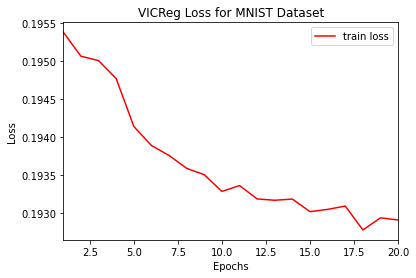

In [55]:
epochs = np.array(df.iloc[:,0])
losses = np.array(df.iloc[:,1])
print(epochs)
plt.plot(epochs, losses, label = "train loss", color = "red")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xlim(1,20)
plt.title("VICReg Loss for MNIST Dataset")
plt.legend()
plt.savefig("/Users/cpare/repos/VICReg_project/plots/loss_20epochs.png")


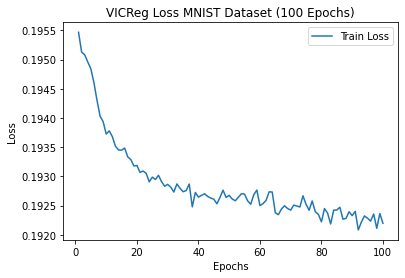

In [65]:
df = pd.read_csv("/Users/cpare/repos/VICReg_project/csv's/VICReg_metrics_100epochs.csv")
epochs = np.array(df.iloc[:, 0])
losses = np.array(df.iloc[:,1])

plt.plot(epochs, losses, label = "Train Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("VICReg Loss MNIST Dataset (100 Epochs)")
plt.savefig("/Users/cpare/repos/VICReg_project/plots/loss_100epochs.png")

In [69]:
df = pd.read_csv("/Users/cpare/repos/VICReg_project/csv's/VICReg_metrics_allLosses.csv")
df.head()

,Epoch,Loss,Invariance Loss,Variance Loss,Covariance Loss
0,1,0.195688,0.003710,0.191978,1.780991e-13
1,2,0.195276,0.004236,0.191040,2.547968e-13
2,3,0.195146,0.004387,0.190759,2.795214e-13
3,4,0.195095,0.004445,0.190650,2.784698e-13
4,5,0.194971,0.004566,0.190405,3.054706e-13


In [71]:
epochs = np.array(df.iloc[:,0])
total_loss = np.array(df.iloc[:,1])
inv_loss = np.array(df.iloc[:,2])
var_loss = np.array(df.iloc[:,3])
cov_loss = np.array(df.iloc[:,4])

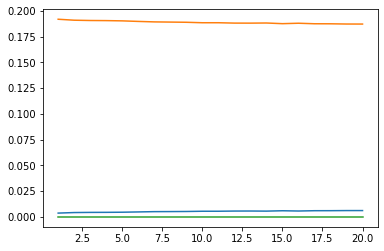

In [77]:

plt.plot(epochs, inv_loss)
plt.plot(epochs, var_loss)
plt.plot(epochs, cov_loss)

In [14]:

dataset = torchvision.datasets.MNIST(root="./", train=True, transform=transforms.ToTensor())
print(len(dataset))
train_data, val_data = random_split(dataset, [50000, 10000])
print(len(train_data))

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_loader = DataLoader(dataset=val_data, batch_size = batch_size, shuffle= True, num_workers=2, pin_memory=True)

60000
50000


# Practicing with saving and loading models

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader, Dataset, random_split
from torch.utils.data import random_split
import matplotlib.pyplot as plt
from torchinfo import summary

In [3]:
data = torch.rand([1,1,28,28])
c1 = nn.Conv2d(1,3,2)
c2 = nn.Conv2d(3,6,2)
max = nn.MaxPool2d(2,2)
x = c1(data)
x = c2(x)
x = max(x)
print(x.shape)
x = x.view(-1, 1014)
print(x.shape)


torch.Size([1, 6, 13, 13])
torch.Size([1, 1014])


[W NNPACK.cpp:79] Could not initialize NNPACK! Reason: Unsupported hardware.


In [10]:
data = torch.rand([1,1,28,28])
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1,3,2)
        self.conv2 = nn.Conv2d(3,6,2)
        self.maxpool = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(1014,3)
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.maxpool(x)
        x = x.view(-1, 1014)
        x = self.fc1(x)

        return x
# Initialize model
model = Model()
FILE = "/Users/cpare/repos/VICReg_project/saved_models/model.pth"
# Save Model
torch.save(model.state_dict(), FILE)

for param in model.parameters():
    print(param)


# loaded_model = Model()
# loaded_model.load_state_dict(torch.load(FILE))
# loaded_model.eval()



        

Parameter containing:
tensor([[[[ 0.0607, -0.4154],
          [ 0.0299, -0.2130]]],


        [[[ 0.1858,  0.1999],
          [-0.0543,  0.4631]]],


        [[[ 0.3162, -0.4809],
          [-0.1477, -0.1458]]]], requires_grad=True)
Parameter containing:
tensor([ 0.2729,  0.4166, -0.4654], requires_grad=True)
Parameter containing:
tensor([[[[ 1.9487e-02,  1.5281e-02],
          [ 1.9601e-01,  2.0930e-01]],

         [[-7.4244e-02, -8.4726e-02],
          [-2.2381e-01,  1.5637e-01]],

         [[-1.2388e-01,  1.5985e-01],
          [ 2.6235e-02,  2.2381e-01]]],


        [[[ 1.4612e-01, -8.1123e-02],
          [ 8.3552e-02, -1.1913e-01]],

         [[ 2.7264e-01,  2.7497e-01],
          [-2.8575e-01, -8.1969e-02]],

         [[-1.2872e-01,  1.3871e-01],
          [-1.2844e-01,  6.6356e-02]]],


        [[[ 2.4167e-01, -2.7086e-01],
          [ 8.8348e-02,  8.1858e-03]],

         [[-2.2238e-01, -1.3413e-01],
          [ 1.4586e-03, -1.1462e-01]],

         [[ 2.0139e-01,  8.7482e-02],
 

In [28]:
loaded_model = Model()
loaded_model.load_state_dict(torch.load(FILE))
loaded_model.eval()

for param in loaded_model.parameters():
    print(param)


Parameter containing:
tensor([[[[-0.4657,  0.4162],
          [ 0.3249, -0.3605]]],


        [[[-0.1864,  0.1252],
          [-0.2970, -0.3610]]],


        [[[ 0.2265,  0.4460],
          [-0.0644,  0.3437]]]], requires_grad=True)
Parameter containing:
tensor([-0.4030, -0.4202,  0.4476], requires_grad=True)
Parameter containing:
tensor([[[[ 0.1365,  0.2250],
          [-0.0767, -0.2583]],

         [[ 0.1464, -0.1999],
          [-0.1809,  0.1731]],

         [[-0.1935,  0.1201],
          [ 0.2404,  0.1523]]],


        [[[-0.0632,  0.2539],
          [-0.2751, -0.0628]],

         [[-0.2810,  0.0147],
          [-0.2611,  0.1921]],

         [[ 0.0202,  0.1187],
          [ 0.1537, -0.2171]]],


        [[[-0.1604,  0.1944],
          [ 0.0822,  0.1410]],

         [[ 0.2586,  0.2441],
          [-0.0310, -0.2803]],

         [[-0.2429, -0.2630],
          [-0.0161, -0.1626]]],


        [[[ 0.1908, -0.0690],
          [ 0.0717, -0.2741]],

         [[ 0.1248, -0.0122],
          [

In [4]:
def f_test(x, is_train: bool = False):
    if (is_train == True):
        x = x + 4
    else:
        x = x +1;
    return x

In [20]:
batch_size = 128
x = torch.rand([batch_size, 1, 28, 28])
x.shape

conv1 = nn.Conv2d(1, 8, kernel_size=1)
#64 output channels --> 
conv2 = nn.Conv2d(8, 16, kernel_size=3)
conv3 = nn.Conv2d(16,32, kernel_size=2)
max_pool = nn.MaxPool2d(2, 2)
fc1_classify = nn.Linear(128,64)
fc2_classfiy = nn.Linear(64,64)
fc3_classify = nn.Linear(64,10)
x = conv1(x)
print(x.shape)
x = max_pool(x)
print(x.shape)
x = conv2(x)
print(x.shape)
x = max_pool(x)
print(x.shape)
x = conv3(x)
print(x.shape)
x = max_pool(x)
print(x.shape)
x = x.view(-1, 128)
print(x.shape)
x = fc1_classify(x)
print(x.shape)
x = fc2_classfiy(x)
print(x.shape)
x = fc3_classify(x)
print(x.shape)

torch.Size([128, 8, 28, 28])
torch.Size([128, 8, 14, 14])
torch.Size([128, 16, 12, 12])
torch.Size([128, 16, 6, 6])
torch.Size([128, 32, 5, 5])
torch.Size([128, 32, 2, 2])
torch.Size([128, 128])
torch.Size([128, 64])
torch.Size([128, 64])
torch.Size([128, 10])


In [4]:
batch_size = 128
dataset = torchvision.datasets.MNIST(root="./", train=True, download=True, transform=transforms.ToTensor())
test_dataset = torchvision.datasets.MNIST(root="./", train=False, download=True, transform=transforms.ToTensor())
train_data, val_data = random_split(dataset, [50000, 10000])

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, pin_memory=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=True, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
n_total_steps = len(train_loader)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [9]:
image_train = next(iter(train_loader))[1]
image_train

tensor([3, 3, 6, 2, 7, 3, 5, 5, 4, 1, 0, 2, 0, 1, 5, 4, 3, 6, 3, 3, 5, 4, 9, 7,
        0, 8, 0, 1, 8, 8, 4, 0, 1, 9, 7, 5, 9, 4, 1, 1, 6, 1, 7, 9, 2, 5, 4, 8,
        8, 4, 7, 8, 9, 1, 7, 1, 4, 1, 1, 7, 1, 7, 0, 2, 2, 8, 6, 1, 0, 8, 5, 0,
        9, 3, 6, 4, 3, 0, 3, 1, 7, 6, 5, 4, 7, 1, 1, 3, 3, 7, 9, 0, 5, 1, 6, 4,
        2, 3, 3, 4, 7, 6, 0, 3, 4, 1, 2, 7, 4, 6, 6, 3, 3, 9, 2, 6, 4, 8, 6, 7,
        5, 0, 0, 1, 1, 0, 0, 5])

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/cpare/repos/VICReg_project/csv's/Classifer_metrics.csv")
epochs = np.array(df.iloc[:,0])
train_loss = np.array(df.iloc[:,1])
val_loss = np.array(df.iloc[:,2])

Text(0.5, 1.0, 'VICReg Model with Classification Task')

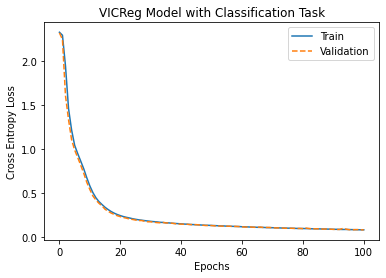

In [33]:
plt.plot(epochs, train_loss, label = "Train")
plt.plot(epochs, val_loss, label = "Validation", ls = "--")
plt.xlabel("Epochs")
plt.ylabel("Cross Entropy Loss")
plt.legend()
plt.title("VICReg Model with Classification Task")

Text(0.5, 1.0, 'VICReg with 32 Dimensional Embedding Space')

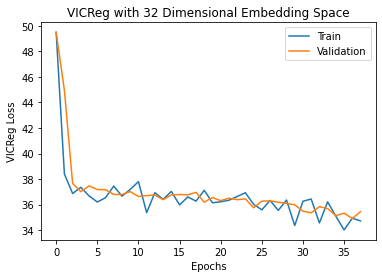

In [28]:
df = pd.read_csv("/Users/cpare/repos/VICReg_project/csv's/VICReg_metrics_64_space.csv")
epochs = np.array(df.iloc[:,0])
train_loss = np.array(df.iloc[:,1])
val_loss = np.array(df.iloc[:,2])

plt.plot(epochs, train_loss, label = "Train")
plt.plot(epochs, val_loss, label = "Validation")
plt.xlabel("Epochs")
plt.ylabel("VICReg Loss")
plt.legend()
plt.title("VICReg with 32 Dimensional Embedding Space")

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("/Users/cpare/repos/VICReg_project/csv's/Classifer_metrics.csv")
df.head()

,Epoch,Train Loss,Val Loss,Train Accuracy,Val Accuracy
0,0,2.305394,2.301235,NaN,NaN
1,1,2.256811,2.097641,23.830,42.41
2,2,1.501369,1.081663,59.672,70.14
3,3,0.896945,0.810068,74.048,76.30
4,4,0.711204,0.676227,79.258,80.14


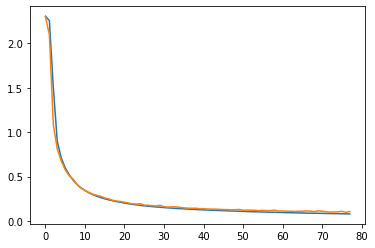

In [8]:
epochs = np.array(df.iloc[:,0])
t_loss = np.array(df.iloc[:,1])
v_loss = np.array(df.iloc[:, 2])
t_acc = np.array(df.iloc[:, 3])
v_acc = np.array(df.iloc[:,4])

plt.plot(epochs, t_loss)
plt.plot(epochs, v_loss)

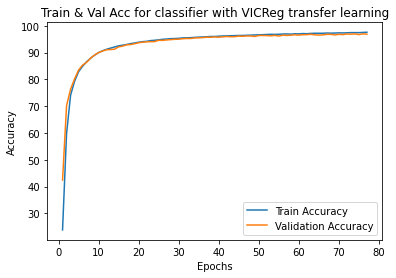

In [17]:
plt.plot(epochs, t_acc, label = "Train Accuracy")
plt.plot(epochs, v_acc, label = "Validation Accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Train & Val Acc for classifier with VICReg transfer learning")
plt.savefig("/Users/cpare/repos/VICReg_project/plots/cc.pdf")

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/cpare/repos/VICReg_project/csv's/VICReg_metrics_64_space.csv")
df.head()


,Epoch,Train Loss,Val Loss,Inv Loss,Var Loss,Cov Loss
0,0,49.495831,49.495831,0.000062,49.495770,2.125054e-12
1,1,38.221622,44.711999,3.596839,41.040321,7.485141e-02
2,2,37.903207,38.704477,10.227702,28.275797,2.009792e-01
3,3,38.299519,38.101567,10.818326,27.036970,2.462768e-01
4,4,38.476800,37.995632,11.124565,26.611021,2.600401e-01


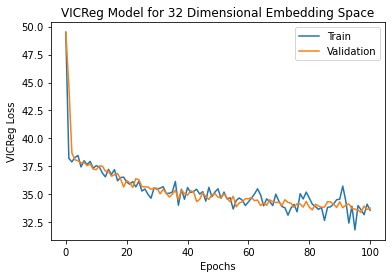

In [38]:
epochs = np.array(df.iloc[:,0])
train = np.array(df.iloc[:,1])
val = np.array(df.iloc[:,2])

plt.plot(epochs, train, label = "Train")
plt.plot(epochs, val, label =  "Validation")
plt.legend()
plt.title("VICReg Model for 32 Dimensional Embedding Space")
plt.xlabel("Epochs")
plt.ylabel("VICReg Loss")
plt.savefig("/Users/cpare/repos/VICReg_project/plots/VICReg_32_loss.jpeg")

In [30]:
df2 = pd.read_csv("/Users/cpare/repos/VICReg_project/csv's/Classifer_metrics.csv")
df2.head()

,Epoch,Train Loss,Val Loss,Train Accuracy,Val Accuracy
0,0,2.311790,2.315361,NaN,NaN
1,1,2.092123,1.622459,35.736,58.78
2,2,1.177116,0.881208,67.534,73.71
3,3,0.760993,0.673692,77.186,79.74
4,4,0.616039,0.566995,81.386,82.61


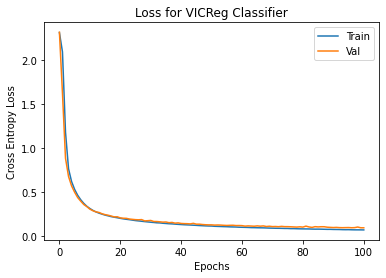

In [39]:
epochs = np.array(df2.iloc[:,0])
t = np.array(df2.iloc[:,1])
v = np.array(df2.iloc[:,2])
t_acc = np.array(df2.iloc[:,3])
v_acc = np.array(df2.iloc[:,4])

plt.plot(epochs, t, label = "Train")
plt.plot(epochs, v, label = "Val")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Cross Entropy Loss")
plt.title("Loss for VICReg Classifier")
plt.savefig("/Users/cpare/repos/VICReg_project/plots/VICReg_classifier_loss.jpeg")

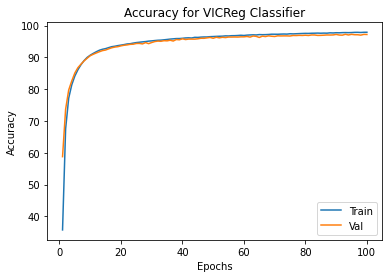

In [40]:
plt.plot(epochs, t_acc, label = "Train")
plt.plot(epochs, v_acc, label = "Val")
plt.title("Accuracy for VICReg Classifier")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.savefig("/Users/cpare/repos/VICReg_project/plots/VICReg_classifier_acc.jpeg")